In [1]:
### ------ hcl() explorations

hcl.wheel <-
    function(chroma = 35, lums = 0:100, hues = 1:360, asp = 1,
             p.cex = 0.6, do.label = FALSE, rev.lum = FALSE,
             fixup = TRUE)
{
    ## Purpose: show chroma "sections" of hcl() color space; see  ?hcl
    ## ----------------------------------------------------------------------
    ## Arguments: chroma: can be vector -> multiple plots are done,
    ##            lums, hues, fixup : all corresponding to hcl()'s args
    ##            rev.lum: logical indicating if luminance
    ## 			should go from outer to inner
    ## ----------------------------------------------------------------------
    ## Author: Martin Maechler, Date: 24 Jun 2005

    require("graphics")
    stopifnot(is.numeric(lums), lums >= 0, lums <= 100,
              is.numeric(hues), hues >= 0, hues <= 360,
              is.numeric(chroma), chroma >= 0, (nch <- length(chroma)) >= 1)
    if(is.unsorted(hues)) hues <- sort(hues)
    if(nch > 1) {
        op <- par(mfrow= n2mfrow(nch), mar = c(0,0,0,0), xpd = TRUE)
        on.exit(par(op))
    }
    for(i.c in 1:nch) {
        plot(-1:1,-1:1, type="n", axes = FALSE, xlab="",ylab="", asp = asp)
        ## main = sprintf("hcl(h = <angle>, c = %g)", chroma[i.c]),
        text(0.4, 0.99, paste("chroma =", format(chroma[i.c])),
             adj = 0, font = 4)
        l.s <- (if(rev.lum) rev(lums) else lums) / max(lums) # <= 1
        for(ang in hues) { # could do all this using outer() instead of for()...
            a. <- ang * pi/180
            z.a <- exp(1i * a.)
            cols <- hcl(ang, c = chroma[i.c], l = lums, fixup = fixup)
            points(l.s * z.a, pch = 16, col = cols, cex = p.cex)
            ##if(do."text") : draw the 0,45,90,... angle "lines"
            if(do.label)
                text(z.a*1.05, labels = ang, col = cols[length(cols)/2],
                     srt = ang)
        }
        if(!fixup) ## show the outline
            lines(exp(1i * hues * pi/180))
   }
   invisible()
}

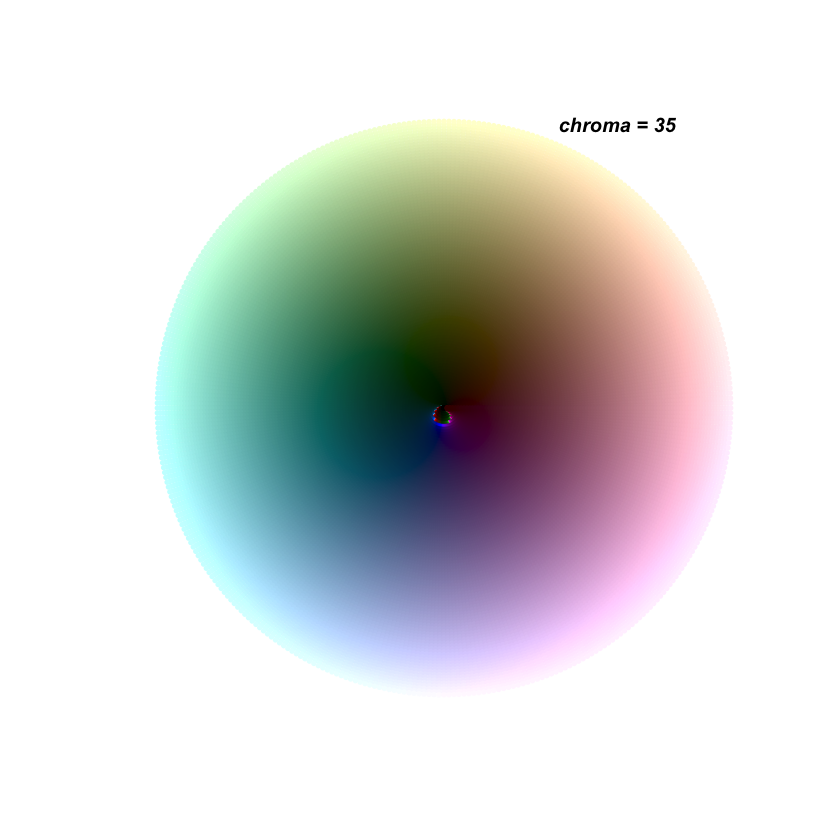

In [2]:
hcl.wheel() # and watch it redraw when you fiddle with the graphic window

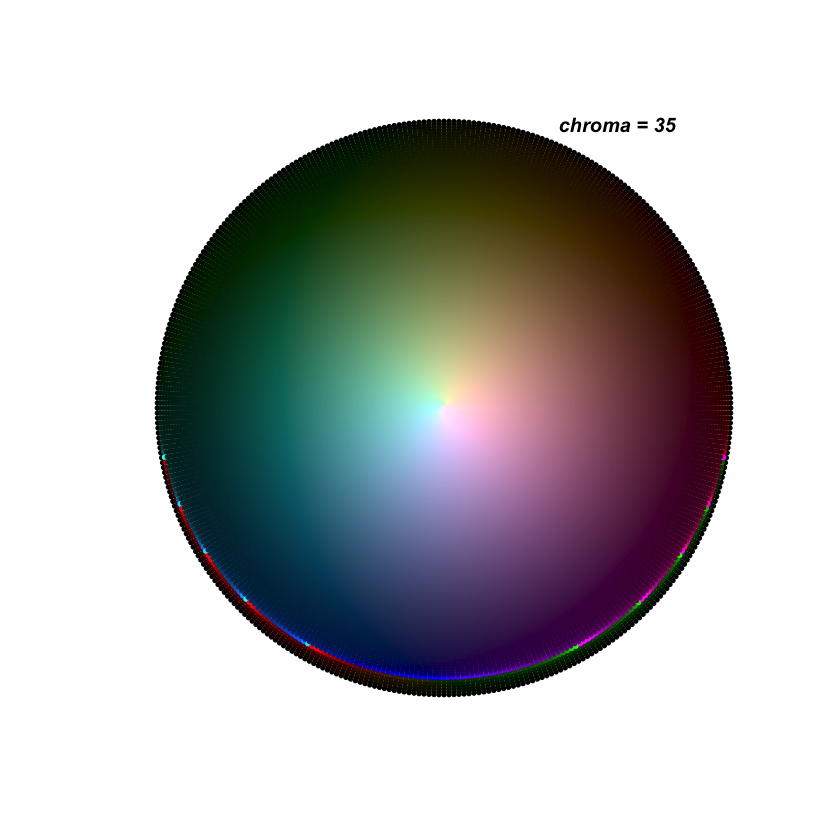

In [3]:
hcl.wheel(rev.lum= TRUE) # ditto

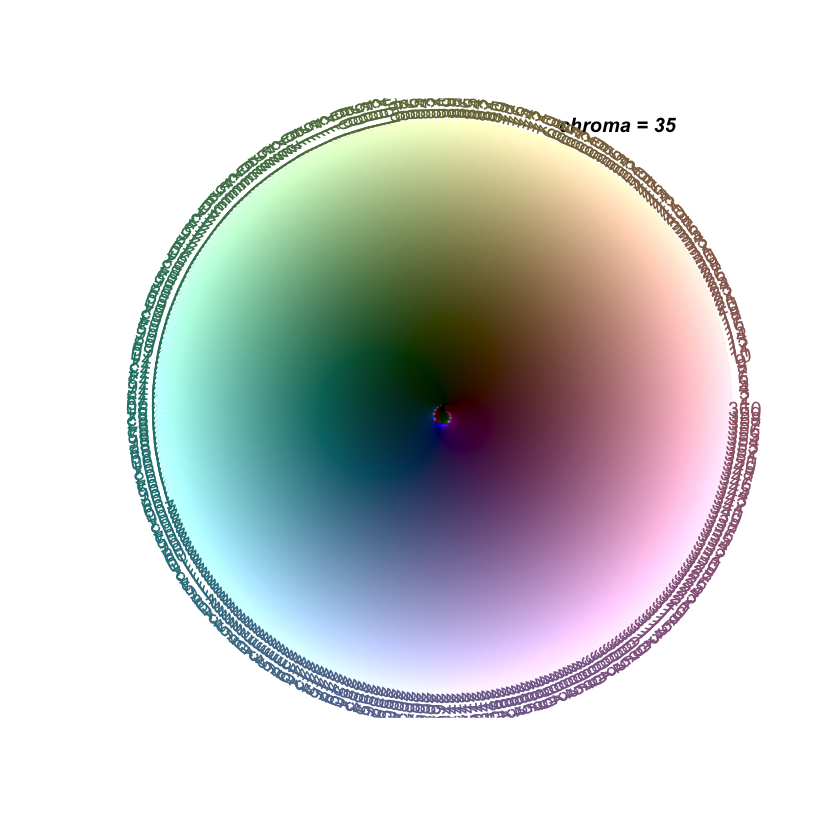

In [4]:
hcl.wheel(do.lab = TRUE) # ditto

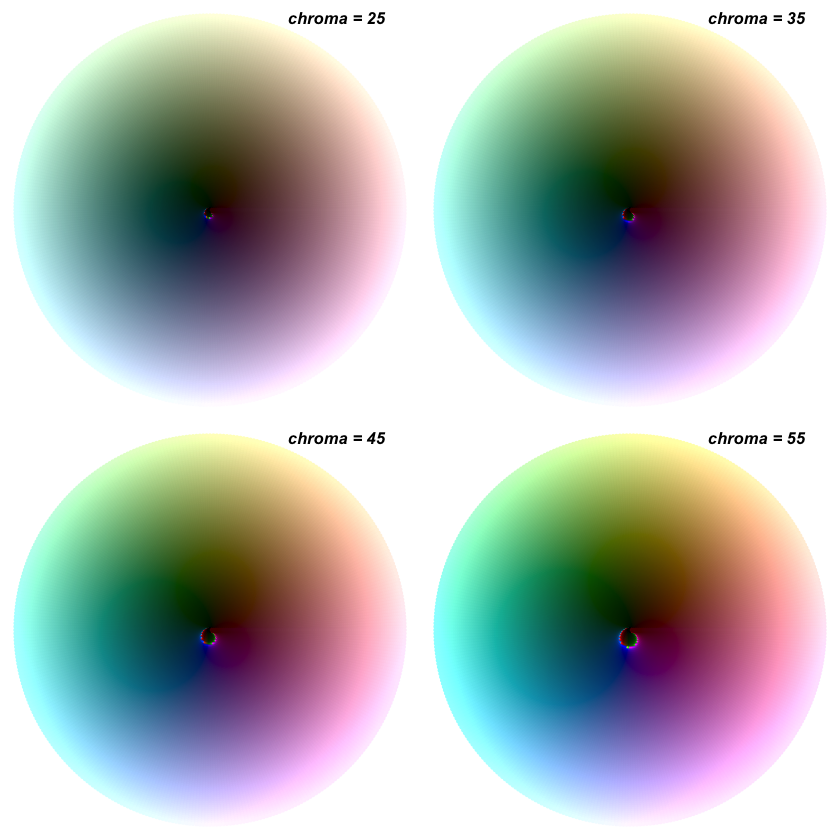

In [5]:
## Now watch:
hcl.wheel(ch = c(25,35,45,55))

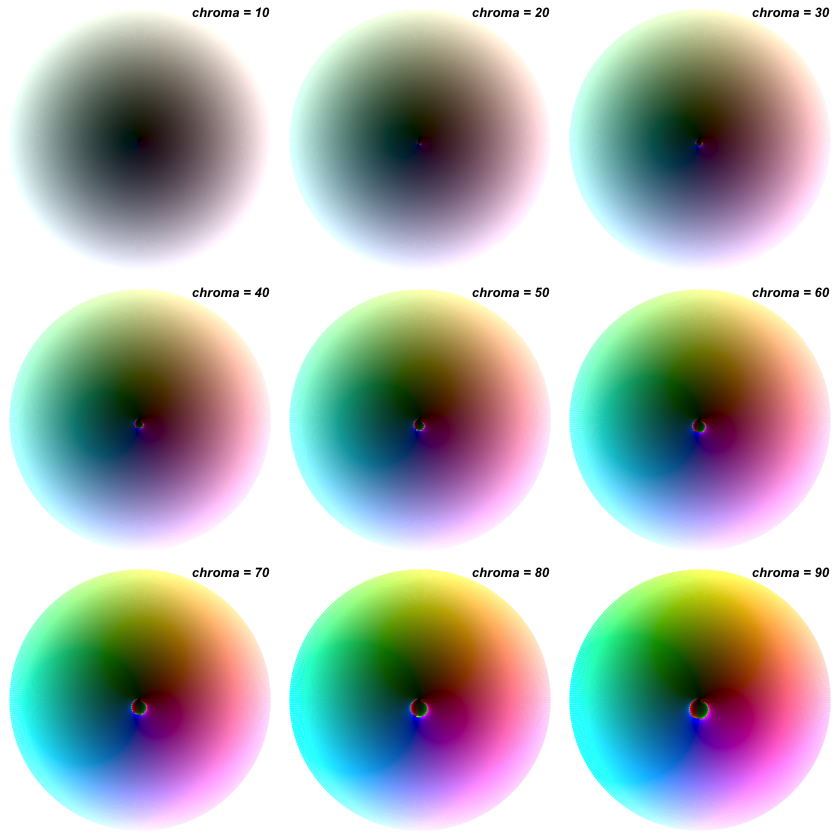

In [6]:
hcl.wheel(ch = seq(10, 90, by = 10), p.cex = 0.4)

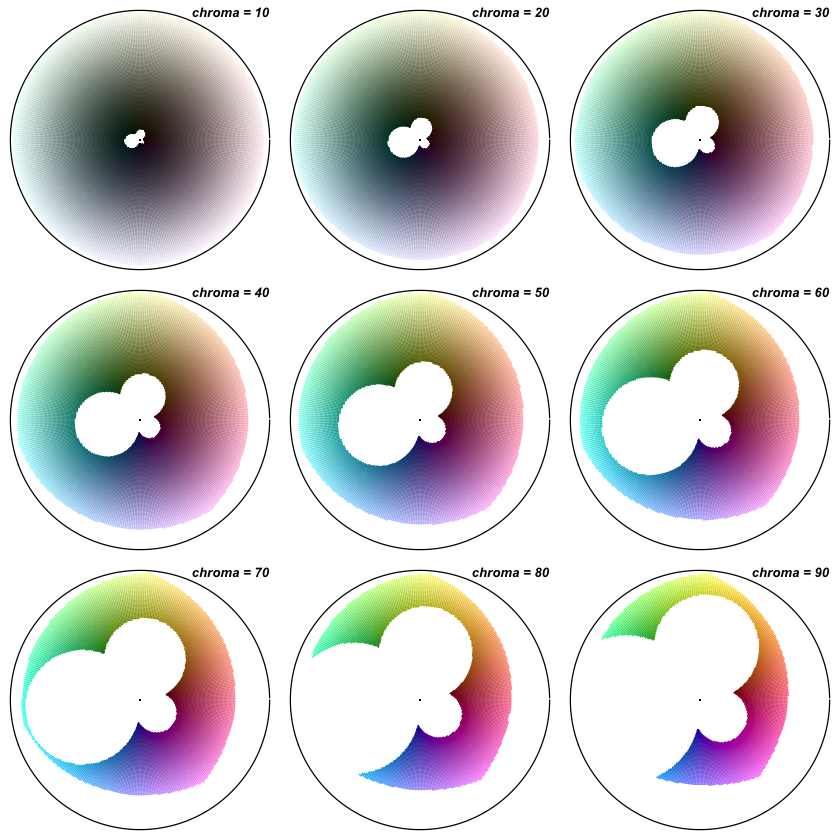

In [7]:
hcl.wheel(ch = seq(10, 90, by = 10), p.cex = 0.3, fixup = FALSE)

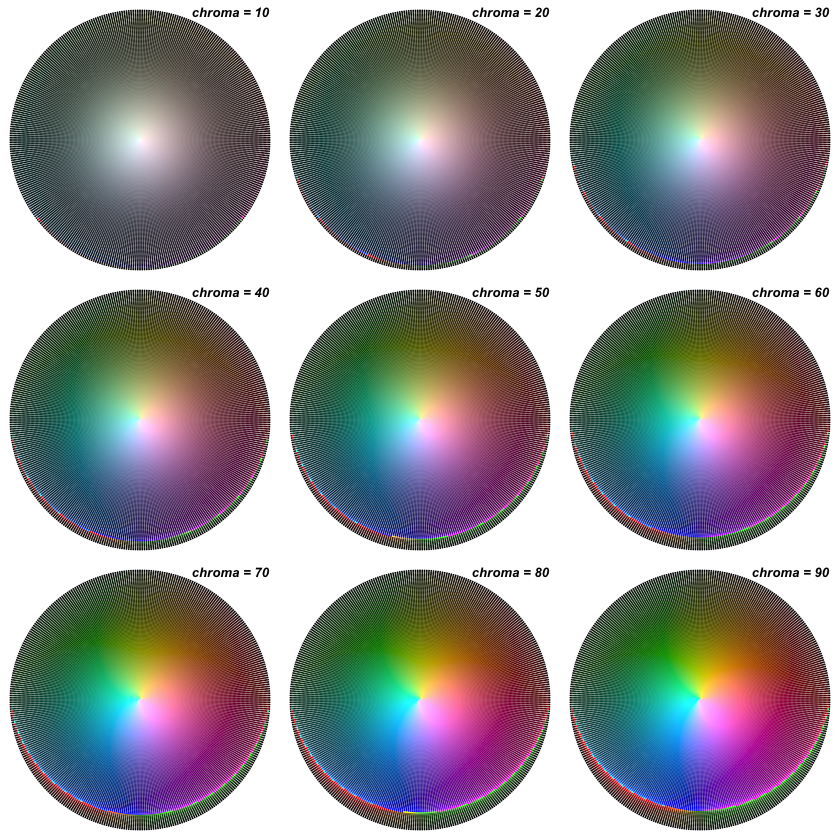

In [8]:
hcl.wheel(ch = seq(10, 90, by = 10), p.cex = 0.3, rev.lum = TRUE)

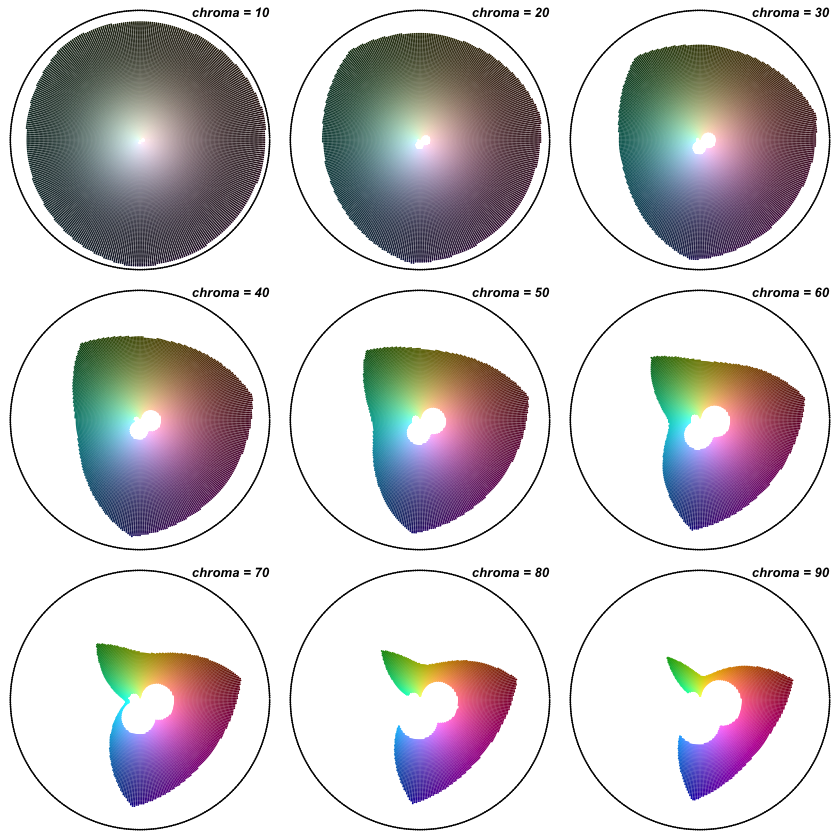

In [9]:
if(dev.interactive()) # new "graphics window" -- to compare with previous :
    dev.new()
hcl.wheel(ch = seq(10, 90, by = 10), p.cex = 0.3, rev.lum = TRUE, fixup=FALSE)